In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
load_path = "data/raw_spot_data_binance_bnb_usdt.csv"

In [3]:
df = pd.read_csv(load_path)
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
df

,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,1509937200000,1.5000,1.7990,0.5000,1.7000,649.120,7.251214e+02,33,207.450,3.514144e+02
1,1509940800000,1.3000,1.6500,1.3000,1.6479,8147.720,1.270853e+04,139,2130.590,3.436513e+03
2,1509944400000,1.5457,1.5525,1.5455,1.5458,6628.200,1.026534e+04,27,563.920,8.754265e+02
3,1509948000000,1.5458,1.6810,1.5387,1.6810,22767.900,3.650714e+04,133,12886.750,2.124768e+04
4,1509951600000,1.6809,1.6809,1.6000,1.6250,14938.730,2.427873e+04,58,7162.660,1.164245e+04
...,...,...,...,...,...,...,...,...,...,...
40438,1655874000000,216.8000,217.9000,216.2000,216.4000,22934.277,4.982139e+06,7591,10727.854,2.330760e+06
40439,1655877600000,216.3000,217.1000,212.1000,213.3000,46833.628,1.000650e+07,14057,19950.378,4.263787e+06
40440,1655881200000,213.3000,214.0000,211.7000,212.0000,37531.152,7.990837e+06,11656,20228.168,4.309136e+06
40441,1655884800000,211.9000,213.9000,211.2000,213.6000,21662.469,4.607757e+06,8627,12799.680,2.723101e+06


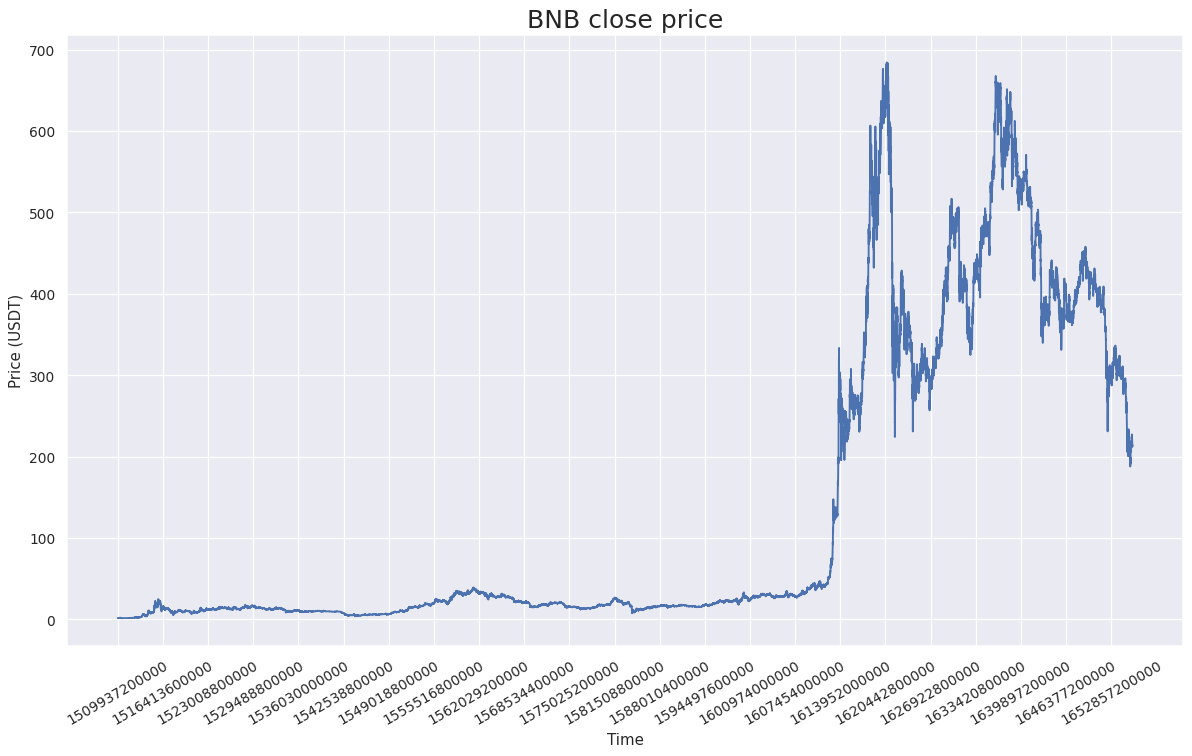

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set()
fig = plt.figure(figsize=(16,9), dpi=90)
ax = fig.add_subplot(111)

ax.plot(df["close"])

ax.set_title("BNB close price", fontsize=20)

ax.set_xticks(range(0,df.shape[0],1800),df['open_time'].loc[::1800],rotation=30)

ax.set_xlabel("Time")
ax.set_ylabel("Price (USDT)")

plt.show()

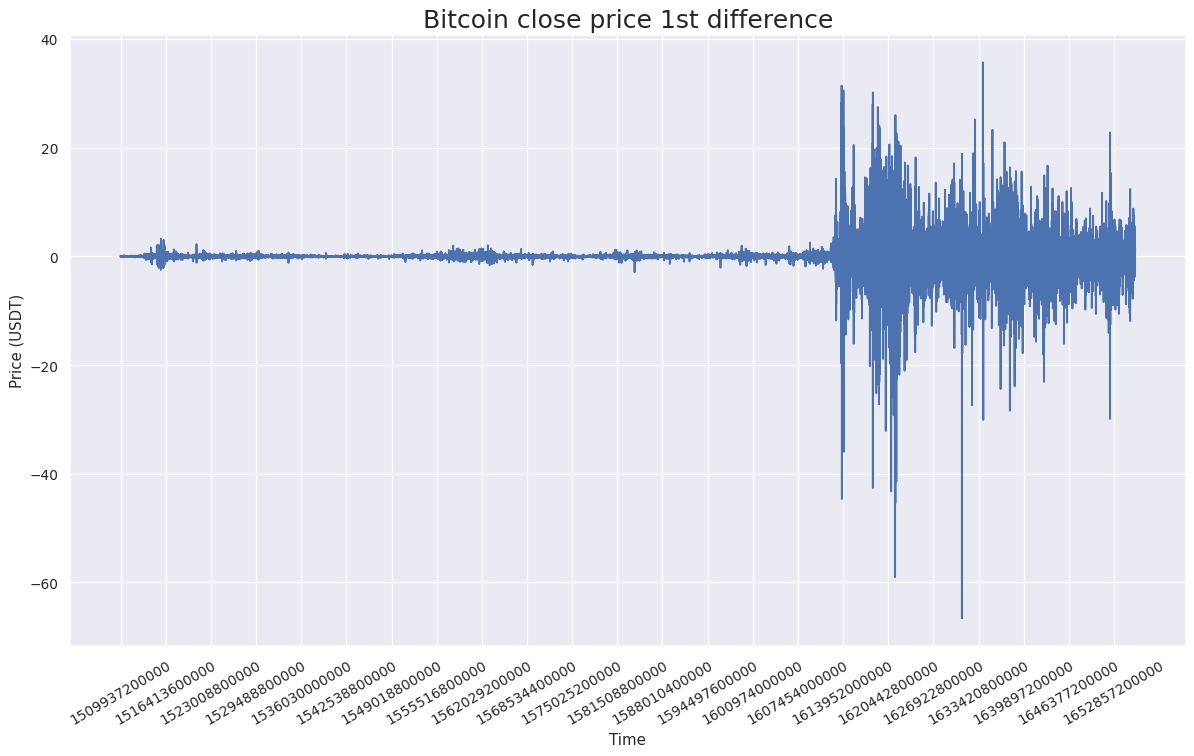

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set()
fig = plt.figure(figsize=(16,9), dpi=90)
ax = fig.add_subplot(111)

ax.plot(df["close"] - df["close"].shift(1))

ax.set_title("Bitcoin close price 1st difference", fontsize=20)

ax.set_xticks(range(0,df.shape[0],1800),df['open_time'].loc[::1800],rotation=30)

ax.set_xlabel("Time")
ax.set_ylabel("Price (USDT)")

plt.show()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose as sm

In [8]:
result = sm(df["close"], model='additive', period=24, two_sided=False)

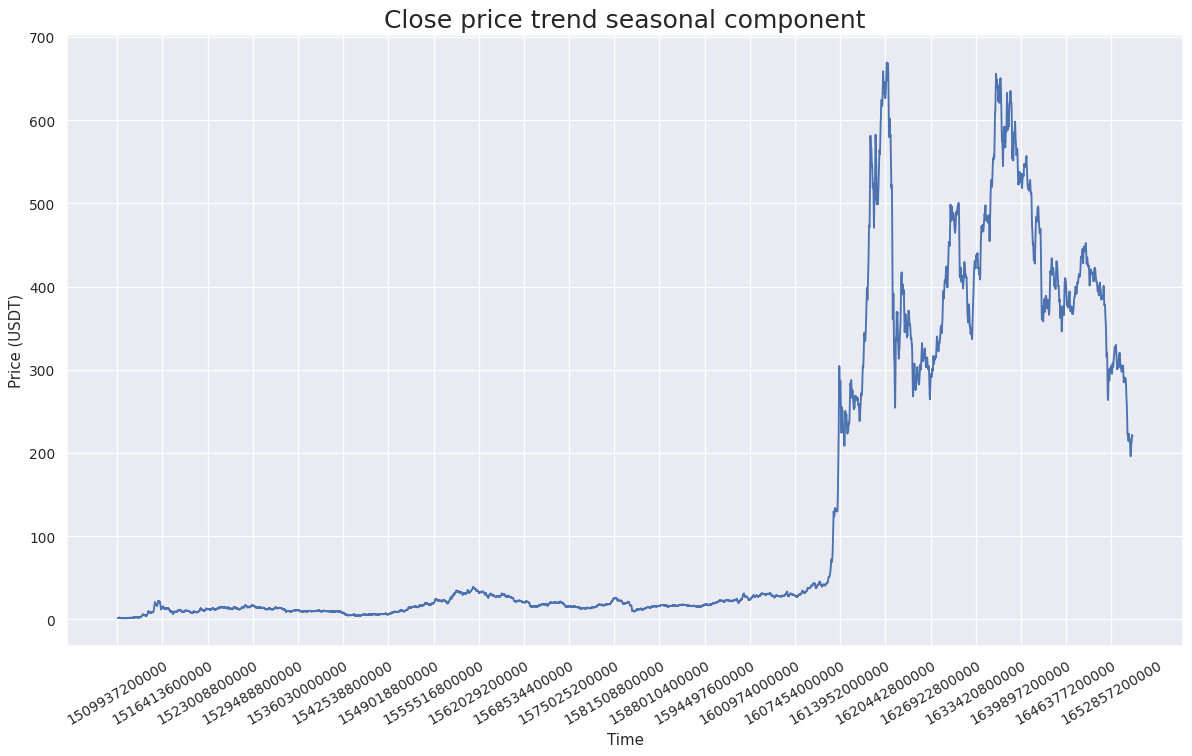

In [9]:
sns.set()
fig = plt.figure(figsize=(16,9), dpi=90)
ax = fig.add_subplot(111)

ax.plot(result._trend + result._seasonal)

ax.set_title("Close price trend seasonal component", fontsize=20)

ax.set_xticks(range(0,df.shape[0],1800),df['open_time'].loc[::1800],rotation=30)

ax.set_xlabel("Time")
ax.set_ylabel("Price (USDT)")

plt.show()

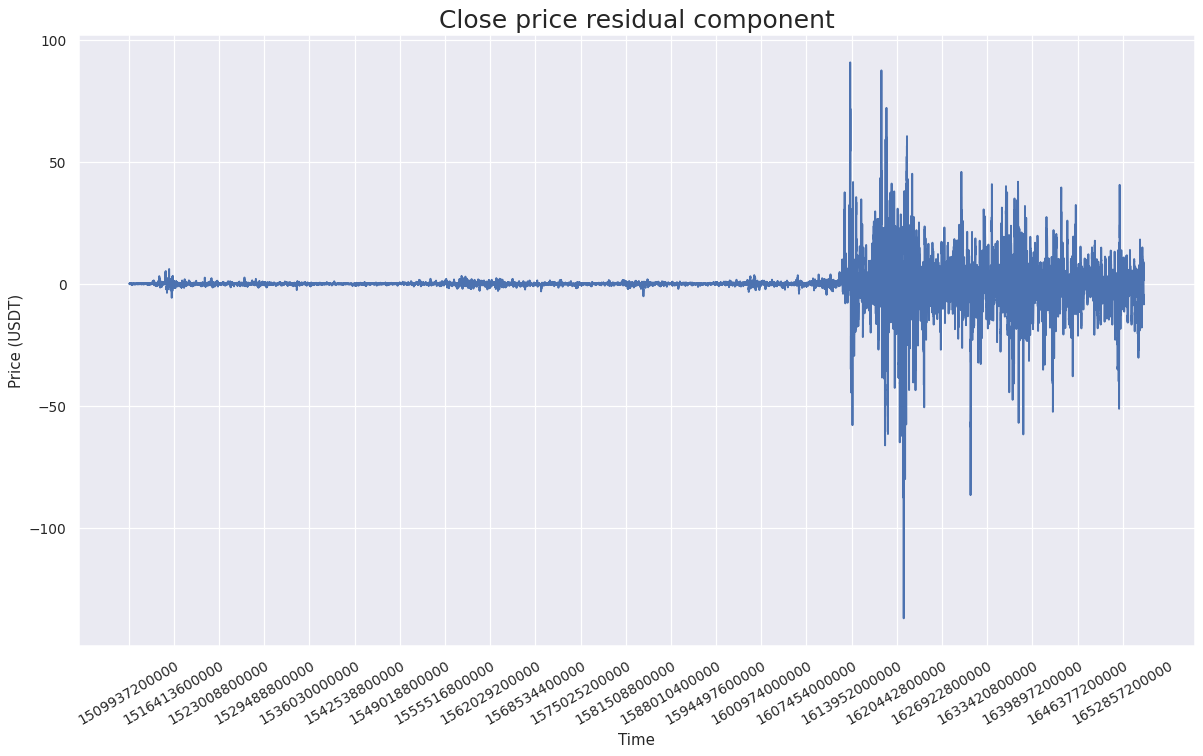

In [10]:
sns.set()
fig = plt.figure(figsize=(16,9), dpi=90)
ax = fig.add_subplot(111)

ax.plot(result._resid)

ax.set_title("Close price residual component", fontsize=20)

ax.set_xticks(range(0,df.shape[0],1800),df['open_time'].loc[::1800],rotation=30)

ax.set_xlabel("Time")
ax.set_ylabel("Price (USDT)")

plt.show()

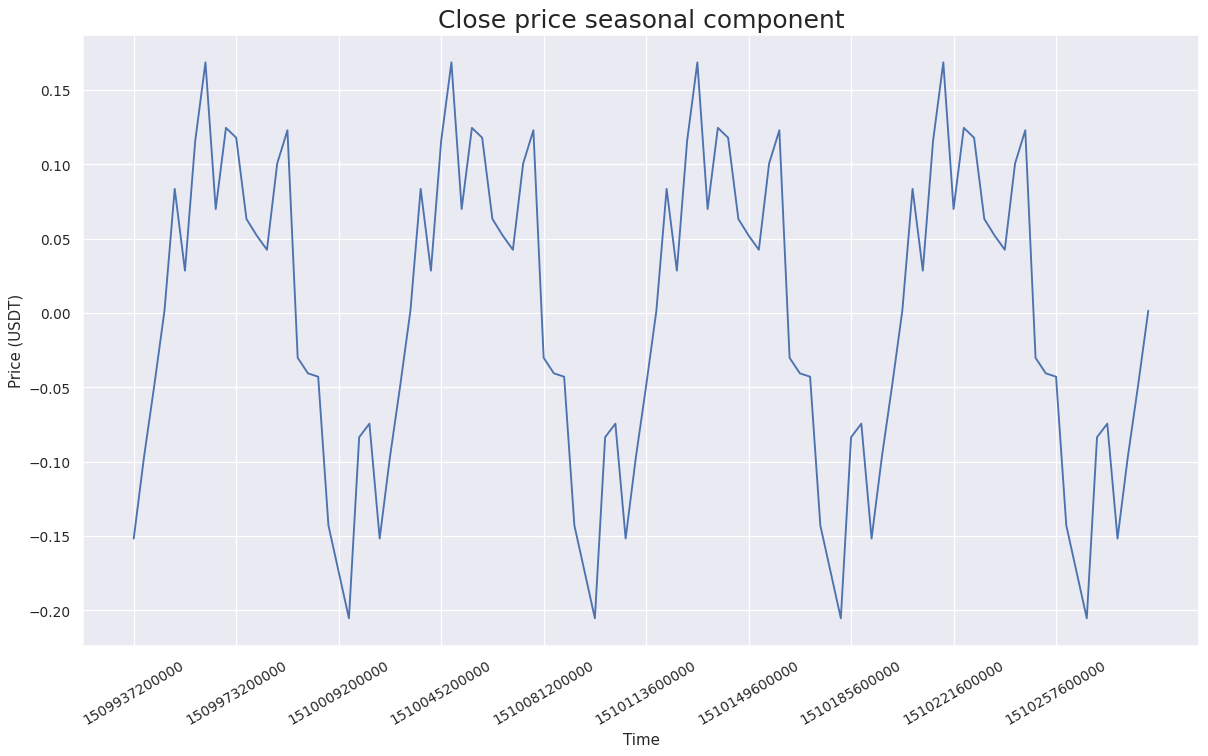

In [11]:
sns.set()
fig = plt.figure(figsize=(16,9), dpi=90)
ax = fig.add_subplot(111)

ax.plot(result._seasonal[:100])

ax.set_title("Close price seasonal component", fontsize=20)

ax.set_xticks(range(0,100,10),df['open_time'][0:100:10],rotation=30)

ax.set_xlabel("Time")
ax.set_ylabel("Price (USDT)")

plt.show()

In [12]:
vol_col = []
for c in df.columns:
    if "vol" in c:
        vol_col.append(c)

<AxesSubplot:>

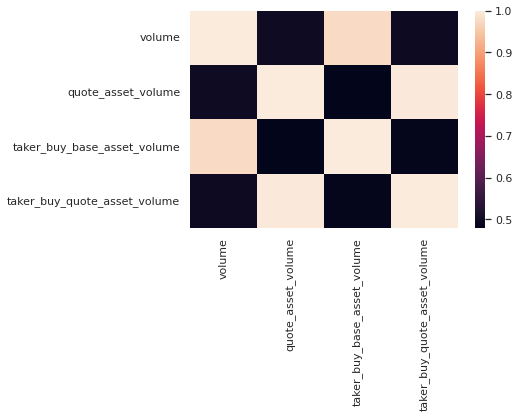

In [13]:
sns.heatmap(df[vol_col].corr())

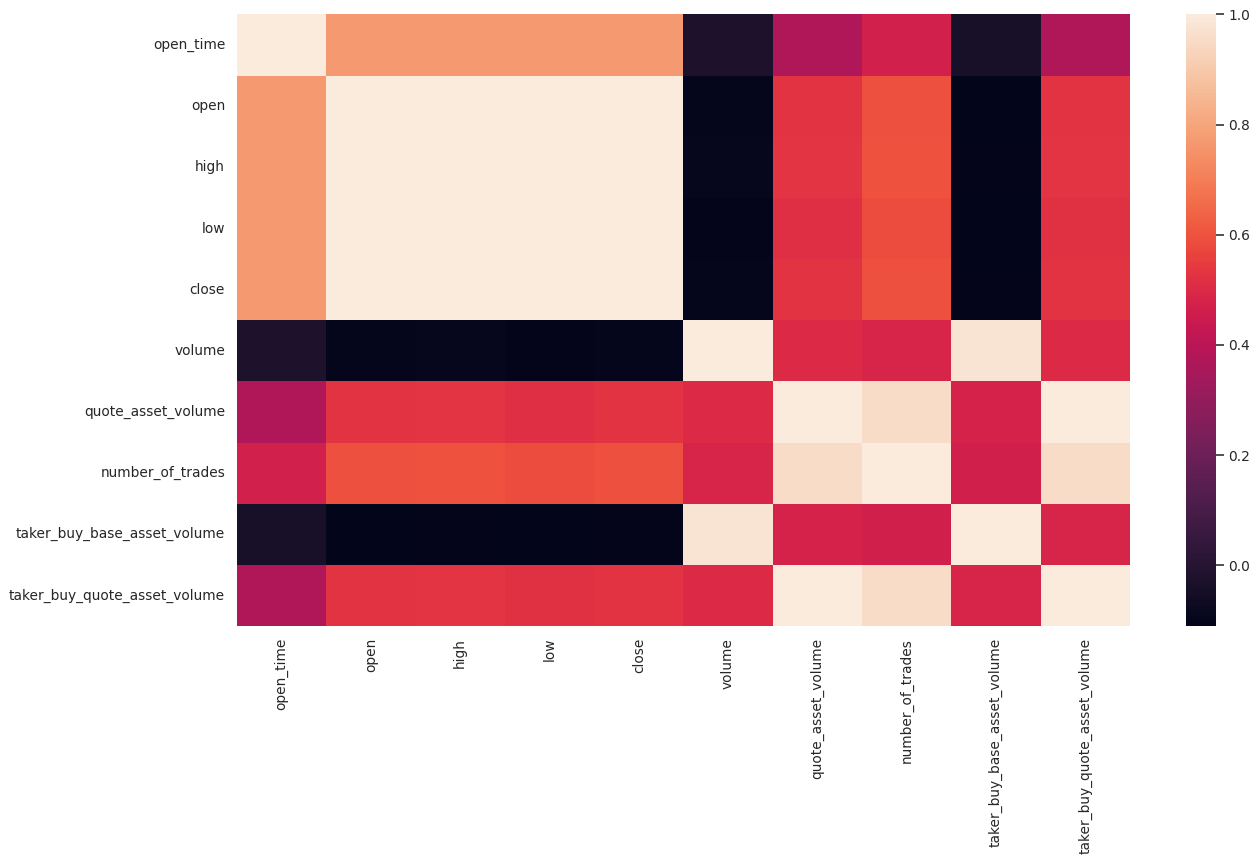

In [14]:
plt.figure(figsize=(16,9), dpi=90)
swarm_plot = sns.heatmap(df.corr())
plt.show()
fig = swarm_plot.get_figure()

In [15]:
df

,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,1509937200000,1.5000,1.7990,0.5000,1.7000,649.120,7.251214e+02,33,207.450,3.514144e+02
1,1509940800000,1.3000,1.6500,1.3000,1.6479,8147.720,1.270853e+04,139,2130.590,3.436513e+03
2,1509944400000,1.5457,1.5525,1.5455,1.5458,6628.200,1.026534e+04,27,563.920,8.754265e+02
3,1509948000000,1.5458,1.6810,1.5387,1.6810,22767.900,3.650714e+04,133,12886.750,2.124768e+04
4,1509951600000,1.6809,1.6809,1.6000,1.6250,14938.730,2.427873e+04,58,7162.660,1.164245e+04
...,...,...,...,...,...,...,...,...,...,...
40438,1655874000000,216.8000,217.9000,216.2000,216.4000,22934.277,4.982139e+06,7591,10727.854,2.330760e+06
40439,1655877600000,216.3000,217.1000,212.1000,213.3000,46833.628,1.000650e+07,14057,19950.378,4.263787e+06
40440,1655881200000,213.3000,214.0000,211.7000,212.0000,37531.152,7.990837e+06,11656,20228.168,4.309136e+06
40441,1655884800000,211.9000,213.9000,211.2000,213.6000,21662.469,4.607757e+06,8627,12799.680,2.723101e+06


<Figure size 1440x810 with 0 Axes>

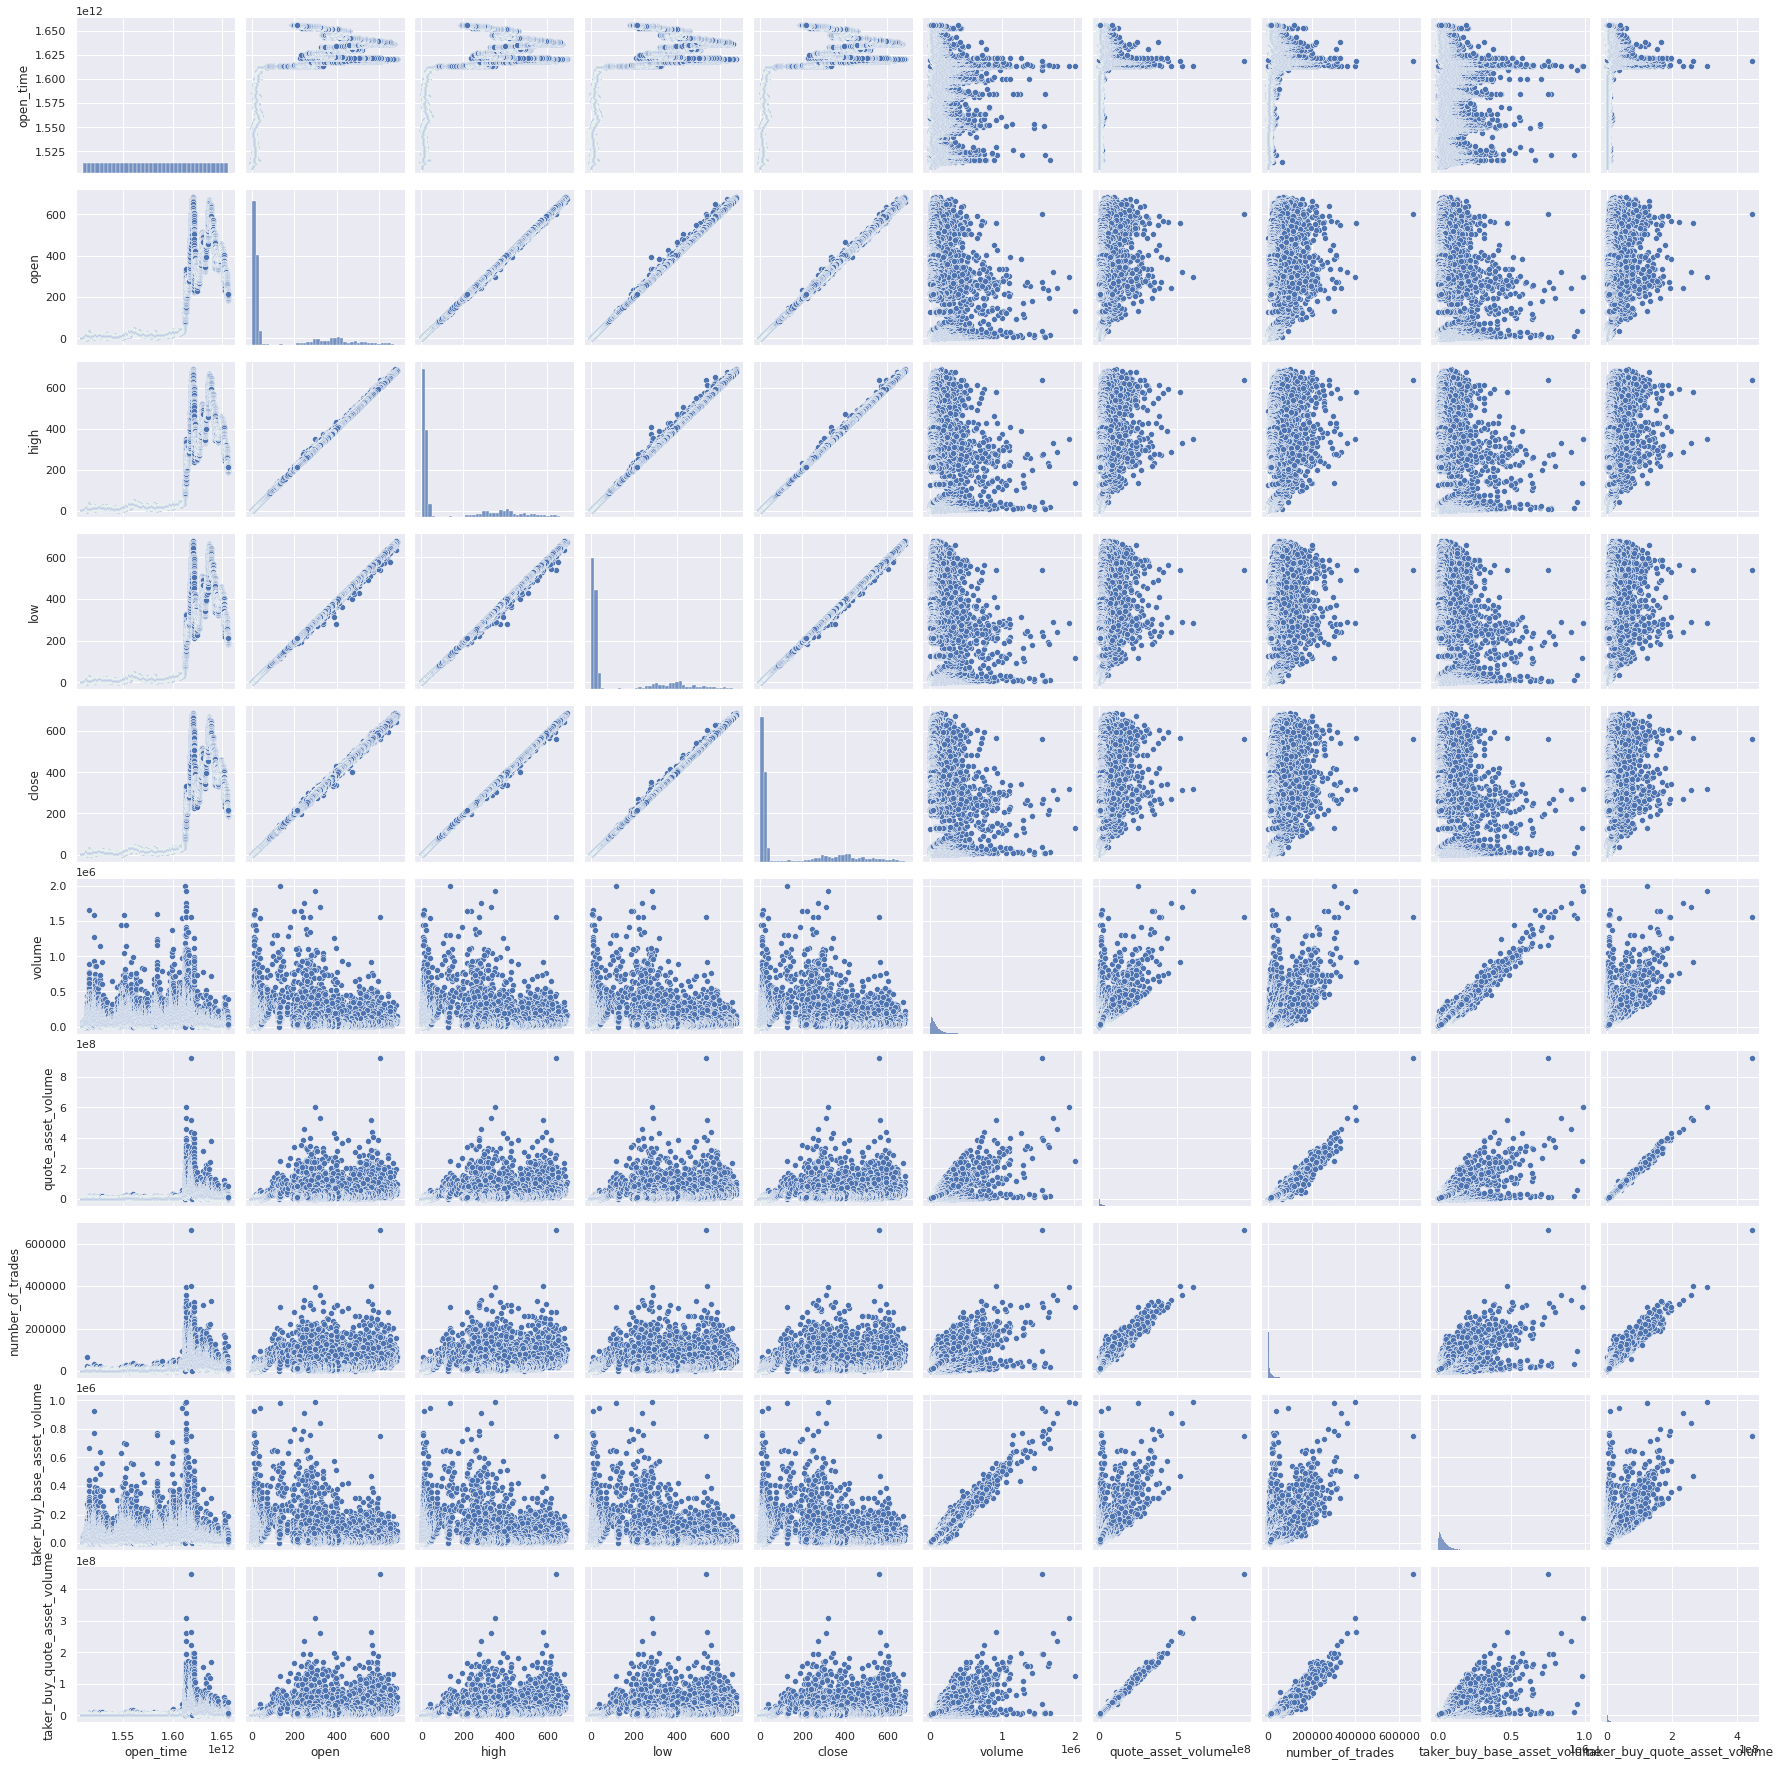

In [16]:
plt.figure(figsize=(16,9), dpi=90)
sns.pairplot(df)
plt.show()

In [17]:
plt.show()

In [18]:
raw_btc_df = pd.read_csv("data/raw_spot_data_binance_btc_usdt.csv")

In [19]:
raw_btc_df["label"] = raw_btc_df["close"] - raw_btc_df["close"].shift(1) > 0

In [20]:
df["label"] = df["close"] - df["close"].shift(1) > 0

In [21]:
df = df[(df["open_time"]>=raw_btc_df["open_time"][0]) & (df["open_time"]<=raw_btc_df["open_time"].to_numpy()[-1])]

In [22]:
raw_btc_df["label"].to_numpy() == df["label"].to_numpy()

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
df.shape

(39399, 11)

In [24]:
raw_btc_df

,Unnamed: 0,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,label
0,0,1513692000000,17440.00,17450.00,16555.00,16575.02,851.460681,1.450454e+07,6212,329.564410,5.615208e+06,False
1,1,1513695600000,16575.02,17292.00,16565.00,17164.85,781.059288,1.318851e+07,5868,335.137112,5.663478e+06,True
2,2,1513699200000,17164.83,17772.61,17110.02,17772.61,566.588606,9.879879e+06,4481,275.387489,4.805488e+06,True
3,3,1513702800000,17774.96,18050.00,17750.01,17889.94,491.644333,8.794041e+06,4260,205.938338,3.685139e+06,True
4,4,1513706400000,17889.95,18185.18,17700.00,17912.02,265.067656,4.757423e+06,2741,116.010971,2.083426e+06,True
...,...,...,...,...,...,...,...,...,...,...,...,...
39394,39394,1655874000000,20435.08,20595.42,20364.74,20368.76,2740.163170,5.614389e+07,48082,1405.747950,2.880244e+07,False
39395,39395,1655877600000,20368.77,20450.99,19950.34,20112.97,5405.359390,1.088568e+08,75155,2482.563810,5.001024e+07,False
39396,39396,1655881200000,20112.97,20249.71,19966.62,20099.62,3610.850350,7.270540e+07,54303,1730.280180,3.484302e+07,False
39397,39397,1655884800000,20099.62,20257.00,20038.85,20235.07,2234.157560,4.508790e+07,39404,1178.354920,2.378484e+07,True


In [30]:
(raw_btc_df["label"].shift(1).to_numpy() == df["label"].to_numpy()).sum()

18767

In [28]:
raw_btc_df.shape[0]

39399

In [31]:
18767/39399

0.4763318865961065

In [2]:
df = pd.read_csv("data/final_features_spot_data_binance_bnb_usdt.csv")

In [3]:
df

,Unnamed: 0,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,...,low_MeanDev48_over_StdDev48,close_MeanDev48_over_StdDev48,open_MeanDev96_over_StdDev96,high_MeanDev96_over_StdDev96,low_MeanDev96_over_StdDev96,close_MeanDev96_over_StdDev96,open_MeanDev192_over_StdDev192,high_MeanDev192_over_StdDev192,low_MeanDev192_over_StdDev192,close_MeanDev192_over_StdDev192
0,359,-0.017475,-0.009807,0.004459,-0.001382,27991.420,-0.770042,835,13377.260,0.000000,...,0.408990,1.221422,-1.474792,-1.203656,-1.410041,-1.474792,-2.986657,-2.419783,-2.984922,-2.986657
1,360,0.000238,0.000791,0.005023,0.008555,28763.980,-0.761961,790,14549.320,0.000000,...,0.106268,1.436211,-1.093818,-0.798879,-1.271462,-1.093818,-2.899915,-2.454106,-2.901962,-2.899915
2,361,0.004112,-0.001895,-0.000054,-0.004108,27581.800,-0.766546,757,10990.400,0.000000,...,-0.518576,0.442003,-0.816582,-0.376202,-1.224567,-0.816582,-2.762378,-2.416371,-2.688762,-2.762378
3,362,0.000382,0.023635,0.004440,0.025084,102772.700,-0.320039,2229,78444.050,0.000000,...,-0.499235,-0.607328,-0.663679,-0.468703,-1.190264,-0.663679,-2.551518,-2.333501,-2.549624,-2.551518
4,363,0.023418,0.007886,0.015563,0.010643,108210.480,-0.279803,2457,70875.910,0.000000,...,-0.039069,0.244250,-0.750602,-0.568308,-1.213944,-0.750602,-2.458732,-2.303169,-2.477690,-2.458732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38460,38819,0.006014,0.003678,0.007428,-0.002308,22934.277,-0.599426,7591,10727.854,-0.621575,...,0.050385,0.239593,1.820103,1.940797,2.398887,1.820103,-2.500601,-2.896245,-2.222613,-2.500601
38461,38820,-0.002309,-0.003678,-0.019146,-0.014429,46833.628,-0.042483,14057,19950.378,-0.156698,...,0.601341,0.327066,2.272400,2.264314,1.586701,2.272400,-2.595938,-2.737665,-2.544544,-2.595938
38462,38821,-0.013967,-0.014382,-0.001888,-0.006113,37531.152,-0.266980,11656,20228.168,-0.345383,...,1.922090,1.134613,1.512190,1.391231,0.579814,1.512190,-2.407645,-2.283347,-2.589912,-2.407645
38463,38822,-0.006585,-0.000467,-0.002365,0.007519,21662.469,-0.643127,8627,12799.680,-0.661004,...,2.408639,2.400028,0.364469,0.432960,-0.747604,0.364469,-2.090237,-2.012928,-2.445331,-2.090237


In [4]:
raw_df = pd.read_csv("data/original_features_spot_data_binance_bnb_usdt.csv")

In [5]:
raw_df

,Unnamed: 0,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,...,low_EMA192,low_DEMA192,low_DPO192,low_HMA192,low_MeanDev192,low_StdDev192,low_RSI192,low_ROC192,low_TRIX192,label
0,0,1515762000000,21.1168,21.8990,20.4108,21.2998,105819.310,2.221826e+06,3591,50696.700,...,16.253800,19.618025,-0.076471,18.257467,2.544828,3.363038,55.062942,130.206512,35.883827,False
1,1,1515765600000,21.2000,22.2966,21.0885,21.2712,90481.780,1.964085e+06,3329,48983.610,...,16.303900,19.682844,-2.250007,18.365866,2.520892,3.332308,55.504071,137.226647,35.766584,True
2,2,1515769200000,21.2703,21.9997,20.7507,21.2890,74614.230,1.592371e+06,2339,37760.890,...,16.349981,19.739513,-2.700033,18.468821,2.494303,3.297700,55.232399,133.679054,35.651214,True
3,3,1515772800000,21.2890,22.7844,21.1000,21.9690,118942.490,2.599322e+06,3940,78119.890,...,16.399204,19.802324,-0.315249,18.568061,2.469324,3.264188,55.459013,136.945536,35.538019,True
4,4,1515776400000,21.9700,23.4117,21.8827,23.2800,109496.610,2.485787e+06,3763,69184.630,...,16.456028,19.880118,0.380121,18.667318,2.447905,3.235841,55.961151,143.831968,35.427783,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38819,38819,1655874000000,216.8000,217.9000,216.2000,216.4000,22934.277,4.982139e+06,7591,10727.854,...,219.226193,201.958600,0.282292,214.076893,7.269412,9.464627,46.987635,-0.734619,-9.302969,False
38820,38820,1655877600000,216.3000,217.1000,212.1000,213.3000,46833.628,1.000650e+07,14057,19950.378,...,219.152347,201.990611,-1.053125,214.360563,7.217611,9.420754,46.448415,-5.523385,-9.286878,False
38821,38821,1655881200000,213.3000,214.0000,211.7000,212.0000,37531.152,7.990837e+06,11656,20228.168,...,219.075120,202.014800,-11.083333,214.618259,7.162847,9.371868,46.396198,-5.952910,-9.270567,True
38822,38822,1655884800000,211.9000,213.9000,211.2000,213.6000,21662.469,4.607757e+06,8627,12799.680,...,218.993513,202.029222,-12.504688,214.850934,7.105843,9.312890,46.330752,-6.672559,-9.254059,True


In [3]:
import pandas as pd

pd.read_csv("data/_features/spot/original_spot_binance_bnb_usdt.csv")

,Unnamed: 0,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,...,low_MeanDev48_over_StdDev48,close_MeanDev48_over_StdDev48,open_MeanDev96_over_StdDev96,high_MeanDev96_over_StdDev96,low_MeanDev96_over_StdDev96,close_MeanDev96_over_StdDev96,open_MeanDev192_over_StdDev192,high_MeanDev192_over_StdDev192,low_MeanDev192_over_StdDev192,close_MeanDev192_over_StdDev192
0,359,1517054400000,-0.017475,-0.009807,0.004459,-0.001382,27991.420,-0.770042,835.0,13377.260,...,0.408990,1.221422,-1.474792,-1.203656,-1.410041,-1.474792,-2.986657,-2.419783,-2.984922,-2.986657
1,360,1517058000000,0.000238,0.000791,0.005023,0.008555,28763.980,-0.761961,790.0,14549.320,...,0.106268,1.436211,-1.093818,-0.798879,-1.271462,-1.093818,-2.899915,-2.454106,-2.901962,-2.899915
2,361,1517061600000,0.004112,-0.001895,-0.000054,-0.004108,27581.800,-0.766546,757.0,10990.400,...,-0.518576,0.442003,-0.816582,-0.376202,-1.224567,-0.816582,-2.762378,-2.416371,-2.688762,-2.762378
3,362,1517065200000,0.000382,0.023635,0.004440,0.025084,102772.700,-0.320039,2229.0,78444.050,...,-0.499235,-0.607328,-0.663679,-0.468703,-1.190264,-0.663679,-2.551518,-2.333501,-2.549624,-2.551518
4,363,1517068800000,0.023418,0.007886,0.015563,0.010643,108210.480,-0.279803,2457.0,70875.910,...,-0.039069,0.244250,-0.750602,-0.568308,-1.213944,-0.750602,-2.458732,-2.303169,-2.477690,-2.458732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38562,38921,1655877600000,-0.002309,-0.003678,-0.019146,-0.014429,46833.628,-0.042483,14057.0,19950.378,...,0.601341,0.327066,2.272400,2.264314,1.586701,2.272400,-2.595938,-2.737665,-2.544544,-2.595938
38563,38922,1655881200000,-0.013967,-0.014382,-0.001888,-0.006113,37531.152,-0.266980,11656.0,20228.168,...,1.922090,1.134613,1.512190,1.391231,0.579814,1.512190,-2.407645,-2.283347,-2.589912,-2.407645
38564,38923,1655884800000,-0.006585,-0.000467,-0.002365,0.007519,21662.469,-0.643127,8627.0,12799.680,...,2.408639,2.400028,0.364469,0.432960,-0.747604,0.364469,-2.090237,-2.012928,-2.445331,-2.090237
38565,38924,1655888400000,0.007991,0.006524,0.008956,0.005137,43916.509,-0.109908,12054.0,27049.981,...,2.151021,2.265003,-0.701164,-0.455706,-1.633881,-0.701164,-2.240855,-2.070282,-2.340326,-2.240855
